In [1]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Customize plots
%matplotlib inline
sns.set_theme(style="white")
plt.style.use('grayscale')

In [2]:
# Import additional libraries
# data splitting
from sklearn.model_selection import train_test_split
# performance measures
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score,average_precision_score
# classifier
from sklearn.neighbors import KNeighborsClassifier

### 1. Load Data

In [3]:
df = pd.read_csv('../../Ex02/DiabetesDataset.csv')

### 2. kNN Model - Splitting Table into Data and extra y label column

In [4]:
x = df.drop(columns=['Diabetes'])
y = df['Diabetes'].values
labels = ["No Diabetes", "Diabetes"]


### 2.1 Splitting for Training and Test 

In [5]:
trainX, testX, trainy, testy = train_test_split(x, y, test_size=0.2)

### 2.2 Fit Model 

In [6]:
model =  KNeighborsClassifier(n_neighbors=5).fit(trainX, trainy)

### 2.3 Predict the labels

In [7]:
y_predicted = model.predict(testX)


## 3. Performance Measures - Calculated with Test Label (testy) & predicted label y_predicted

In [8]:
# performance measures
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score,average_precision_score

### 3.1 Confusion Matrix

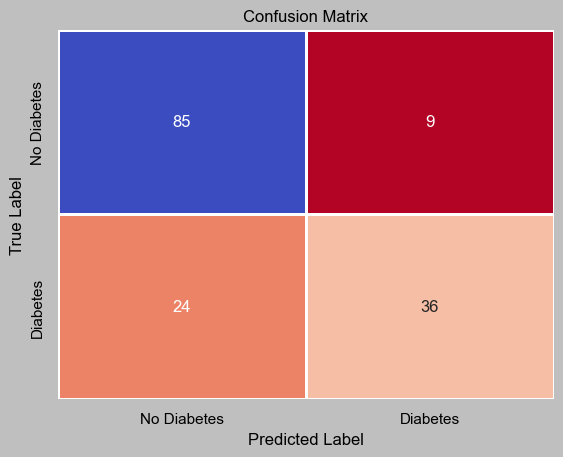

In [9]:
confusion_matrix = confusion_matrix(testy, y_predicted)

sns.heatmap(confusion_matrix, 
            annot=True, 
            fmt='d', 
            cbar=False, 
            cmap="coolwarm_r",
            xticklabels=labels, 
            yticklabels=labels,
            linewidth = 1)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### 3.2 Accuracy

In [10]:
accuracy = accuracy_score(testy, y_predicted)

### 3.3 Recall

In [12]:
recall = recall_score(testy,y_predicted)

### 3.4 Precision

In [13]:
precision = precision_score(testy, y_predicted)

### 3.5 F1 Score

In [14]:
f1 = f1_score(testy, y_predicted)

#### 3.6 Print Measurements

In [15]:
print( "Performance measurements", "\n",
       "accuracy  : ", round(accuracy,3),"\n",
       "recall    : ", round(recall,3), "\n",
       "precision : ", round(precision,3),"\n",
       "f1-score  : ", round(f1,3))

Performance measurements 
 accuracy  :  0.786 
 recall    :  0.6 
 precision :  0.8 
 f1-score  :  0.686


### 4. Performance Curves

#### 4.1 Reciever Operating Characteristic Curve